In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
print("Sample Data:")
print(data.head())

Sample Data:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


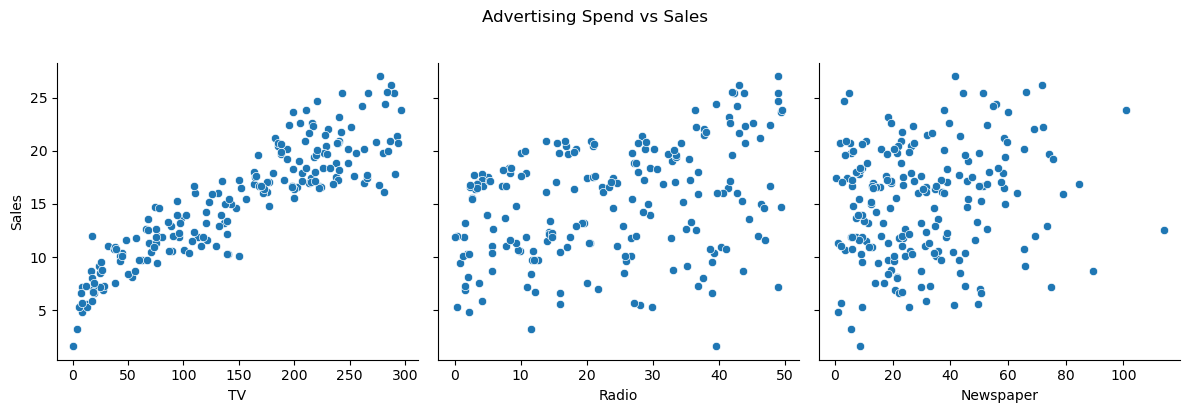

In [4]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter', height=4)
plt.suptitle("Advertising Spend vs Sales", y=1.02)
plt.tight_layout()
plt.show()

In [5]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error: 2.91
R-squared Score: 0.91


In [11]:
print("\nModel Coefficients:")
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Model Coefficients:
           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [12]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [20], 'Newspaper': [10]})
predicted_sales = model.predict(new_data)
print(f"\nPredicted Sales for new data: {predicted_sales[0]:.2f}")


Predicted Sales for new data: 12.23


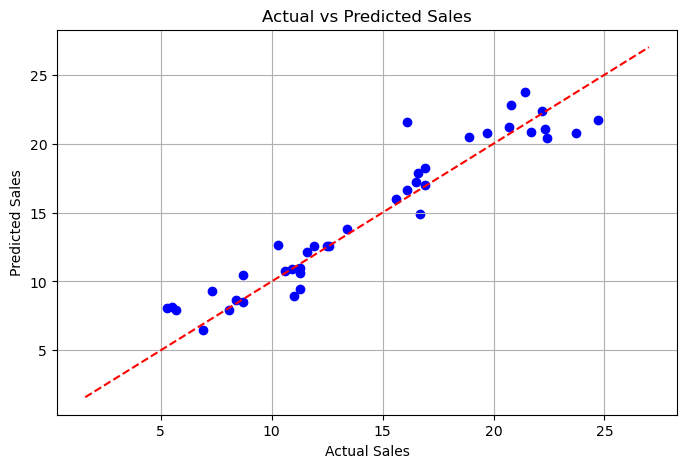

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # ideal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

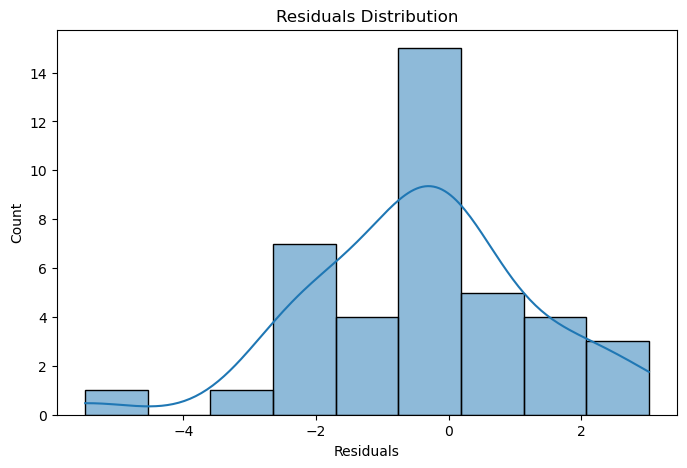

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

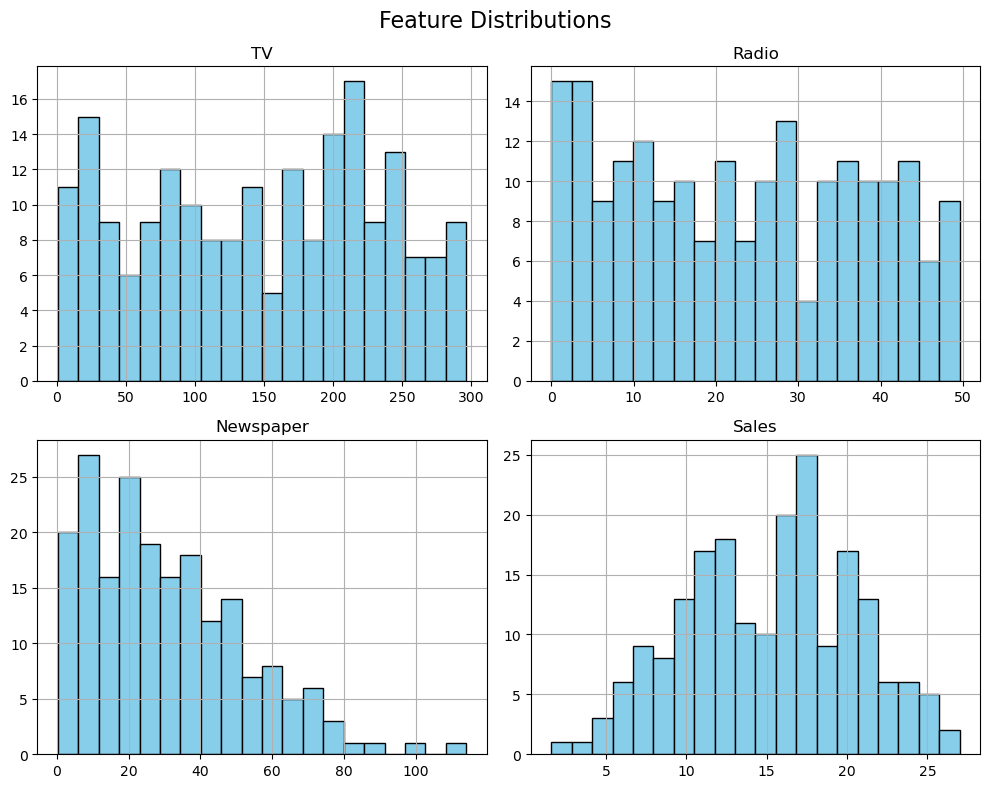

In [16]:
data.hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


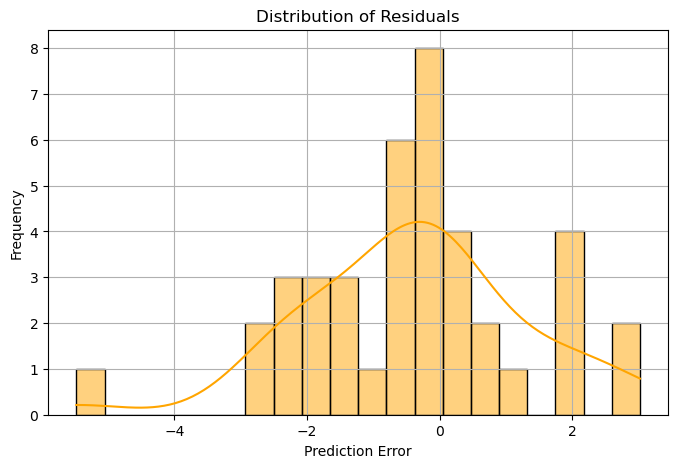

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()